In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=200,noise=0.05,random_state=2)

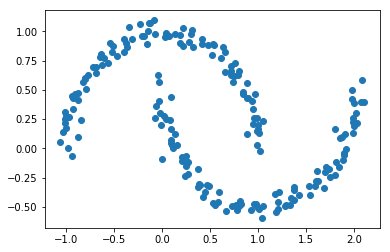

In [9]:
plt.plot(x[:,0],x[:,1],'o')

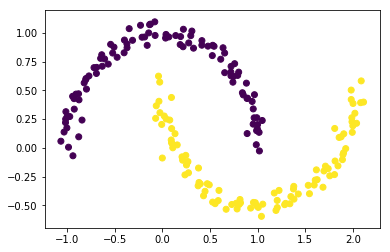

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1])

In [18]:
centers = kmeans.cluster_centers_

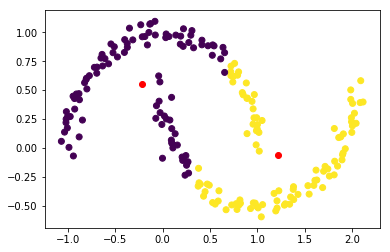

In [22]:
plt.plot(centers[:,0],centers[:,1],'ro')
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_)

In [23]:
kmeans.predict([[-1.0, 1.0], [1.5, -0.5]])

array([0, 1])

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [16]:
from sklearn.preprocessing import scale, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#standiris = scale(iris.data)
norm = Normalizer()
stand_norm_iris = norm.fit_transform(iris.data)
pca = PCA(n_components= 1)
pca.fit(stand_norm_iris)
pca.explained_variance_ratio_

array([0.96210389])

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca.transform(stand_norm_iris))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
from sklearn import metrics 
print(metrics.silhouette_score(pca.transform(stand_norm_iris),kmeans.labels_))
print(metrics.adjusted_rand_score(iris.target,kmeans.labels_))

0.7356078740783958
0.9410449800736683


In [19]:
# plt.scatter(pca.transform(stand_norm_iris)[:,0],pca.transform(stand_norm_iris)[:,1],c=kmeans.labels_)